In [1]:
import cv2
import numpy as np
np.seterr(over='ignore')
from matplotlib import pyplot as plt
plt.style.use('seaborn-deep')
from pylab import hist, show, xticks
from collections import Counter
grids = []
#trying some s


In [2]:
def get_pixel(img, center, x, y):
	
	new_value = 0
	
	try:
		# If local neighbourhood pixel
		# value is greater than or equal
		# to center pixel values then
		# set it to 1
		if img[x][y] >= center:
			new_value = 1
			
	except:
		# Exception is required when
		# neighbourhood value of a center
		# pixel value is null i.e. values
		# present at boundaries.
		pass
	
	return new_value


In [3]:
def Original_Pattern(img,x,y):
    center = img[x][y]
    
    val_ab = []
    
    val_ab.append(get_pixel(img,center,x-1,y-1))
   
    val_ab.append(get_pixel(img,center,x-1,y))
    
    val_ab.append(get_pixel(img,center,x-1,y+1))
    
    val_ab.append(get_pixel(img,center,x,y+1))
    
    val_ab.append(get_pixel(img,center,x+1,y+1))
    
    val_ab.append(get_pixel(img,center,x+1,y))
    
    val_ab.append(get_pixel(img,center,x+1,y-1))
    
    val_ab.append(get_pixel(img,center,x,y-1))
    
    return val_ab
    

In [4]:
def Calculate_lbp(val_ab):
    power_val=np.array([1,2,4,8,16,32,64,128])
    
    
    val = 0
    
    for i in range(len(val_ab)):
        
        val += val_ab[i]*power_val[i]
        
    return val

In [5]:
def draw_grid(img, grid_shape, color=(0, 0, 255), thickness=3):
    h, w, _ = img.shape
    rows, cols = grid_shape
    dy, dx = h / rows, w / cols

    # draw vertical lines
    for x in np.linspace(start=dx, stop=w-dx, num=cols-1):
        x = int(round(x))
        cv2.line(img, (x, 0), (x, h), color=color, thickness=thickness)

    # draw horizontal lines
    for y in np.linspace(start=dy, stop=h-dy, num=rows-1):
        y = int(round(y))
        cv2.line(img, (0, y), (w, y), color=color, thickness=thickness)

    return img

In [6]:
img_bgr = cv2.imread("25_kr.jpg")
 
# resize image
resized = cv2.resize(img_bgr, (440, 440), interpolation = cv2.INTER_AREA)
grid_image = draw_grid(resized,[10,10])
cv2.imshow("deneme",grid_image)
cv2.waitKey(0)
cv2.imwrite('25kr_grided.jpg', grid_image) 


True

In [6]:
def Is_Uniform(pattern):
    trans_count = 0
    for i in range(len(pattern)):
        if i < len(pattern) - 1:
            if pattern[i] != pattern[i+1]:
                trans_count += 1
    return True if trans_count<=2 else False
        

In [7]:
def RLBP(img_lbp,tile_height,tile_width):
    height, width= img_lbp.shape
    tiled_array = img_lbp.reshape(height // tile_height,tile_height,width//tile_width,tile_width)
    tiled_array = tiled_array.swapaxes(1,2)
    return tiled_array
   
    


In [8]:
def update_weights(weights):
    height, width,_,_= weights.shape
    for i in range (height):
        for j in range(width):
            if ((i>=1 and i<=8) and (j>=1 and j<=8)):
                weights[i][j] = 1
            if ((i>=2 and i<=7) and (j>=2 and j<=7)):
                weights[i][j] = 2
            if ((i>=3 and i<=6) and (j>=3 and j<=6)):
                weights[i][j] = 4


    return weights
                

In [11]:
img_bgr = cv2.imread("50kr_obverse.png")
original_pattern = []
lbp_values = []
degisken = []

height, width, _ = img_bgr.shape

weights = np.zeros((height,width),dtype=np.uint8)
#cv2.imshow("deneme",weights)
#cv2.waitKey(0)
print(weights.shape)
weights=RLBP(weights,10,10)

print(weights.shape)

weights = update_weights(weights)
#weights = weights*int((255/4))
#weights = weights.swapaxes(1,2)
#weights = weights.reshape(100,100)

#cv2.imshow("deneme",weights)
#cv2.waitKey(0)

#print(weights[2][9])
#weights = weights*(255/4)
#print(type(weights))
#cv2.imwrite('Bos.jpg', weights) 
#cv2.waitKey(0)
#print(weights.shape)

(100, 100)
(10, 10, 10, 10)


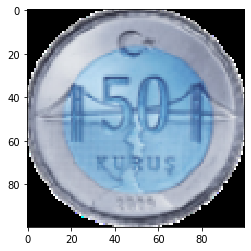

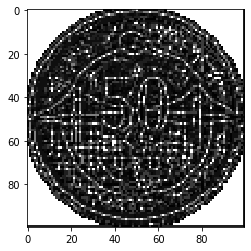

LBP Program is finished
8500
58
[[255 255 255 ... 255 255  31]
 [255 255 255 ... 255 255  31]
 [255 255 255 ... 255 255  31]
 ...
 [255 255 255 ... 255 255  31]
 [255 255 255 ... 255 255  31]
 [ 31  31  31 ...  31  31   7]]
[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   .

In [17]:
img_bgr = cv2.imread("50kr_obverse.png")
original_pattern = []
lbp_values = []
degisken = []

height, width,_ = img_bgr.shape

weights = np.zeros((height,width))
#weights = update_weights(weights)

weights=RLBP(weights,10,10)

weights = update_weights(weights)


uniform_count = 0

# We need to convert RGB image
# into gray one because gray
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
				np.uint8)



for i in range(0,height):
	for j in range(0,width):
		original_pattern = Original_Pattern(img_gray,i,j)
		if Is_Uniform(original_pattern):
			uniform_count += 1
			if original_pattern not in degisken:
 				 degisken.append(original_pattern)
 				           
			for k in range(8):
				rotated_pattern = np.roll(original_pattern,k)   
				lbp_values.append(Calculate_lbp(rotated_pattern))
                
			img_lbp[i][j] = min(lbp_values)
			lbp_values = []
		else:
			img_lbp[i][j] = 59
            

#grids = gridImg(img_lbp,width,height,10,10)   

#l = np.array_split(img_lbp,3,axis=0)
#for i in l:
#    l = np.array_split(i,3,axis=1)
#    grids += l





#for i in range(0,height):
#	for j in range(0,width):
 #       if(i%10==0 and j%10==0):
#          new_img[i][j] = img_lbp[i][j]
#		RLBP(new_img)
                

        

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

print("LBP Program is finished")
print(uniform_count)
print(len(degisken))
print(img_lbp)
print(weights)


10
10


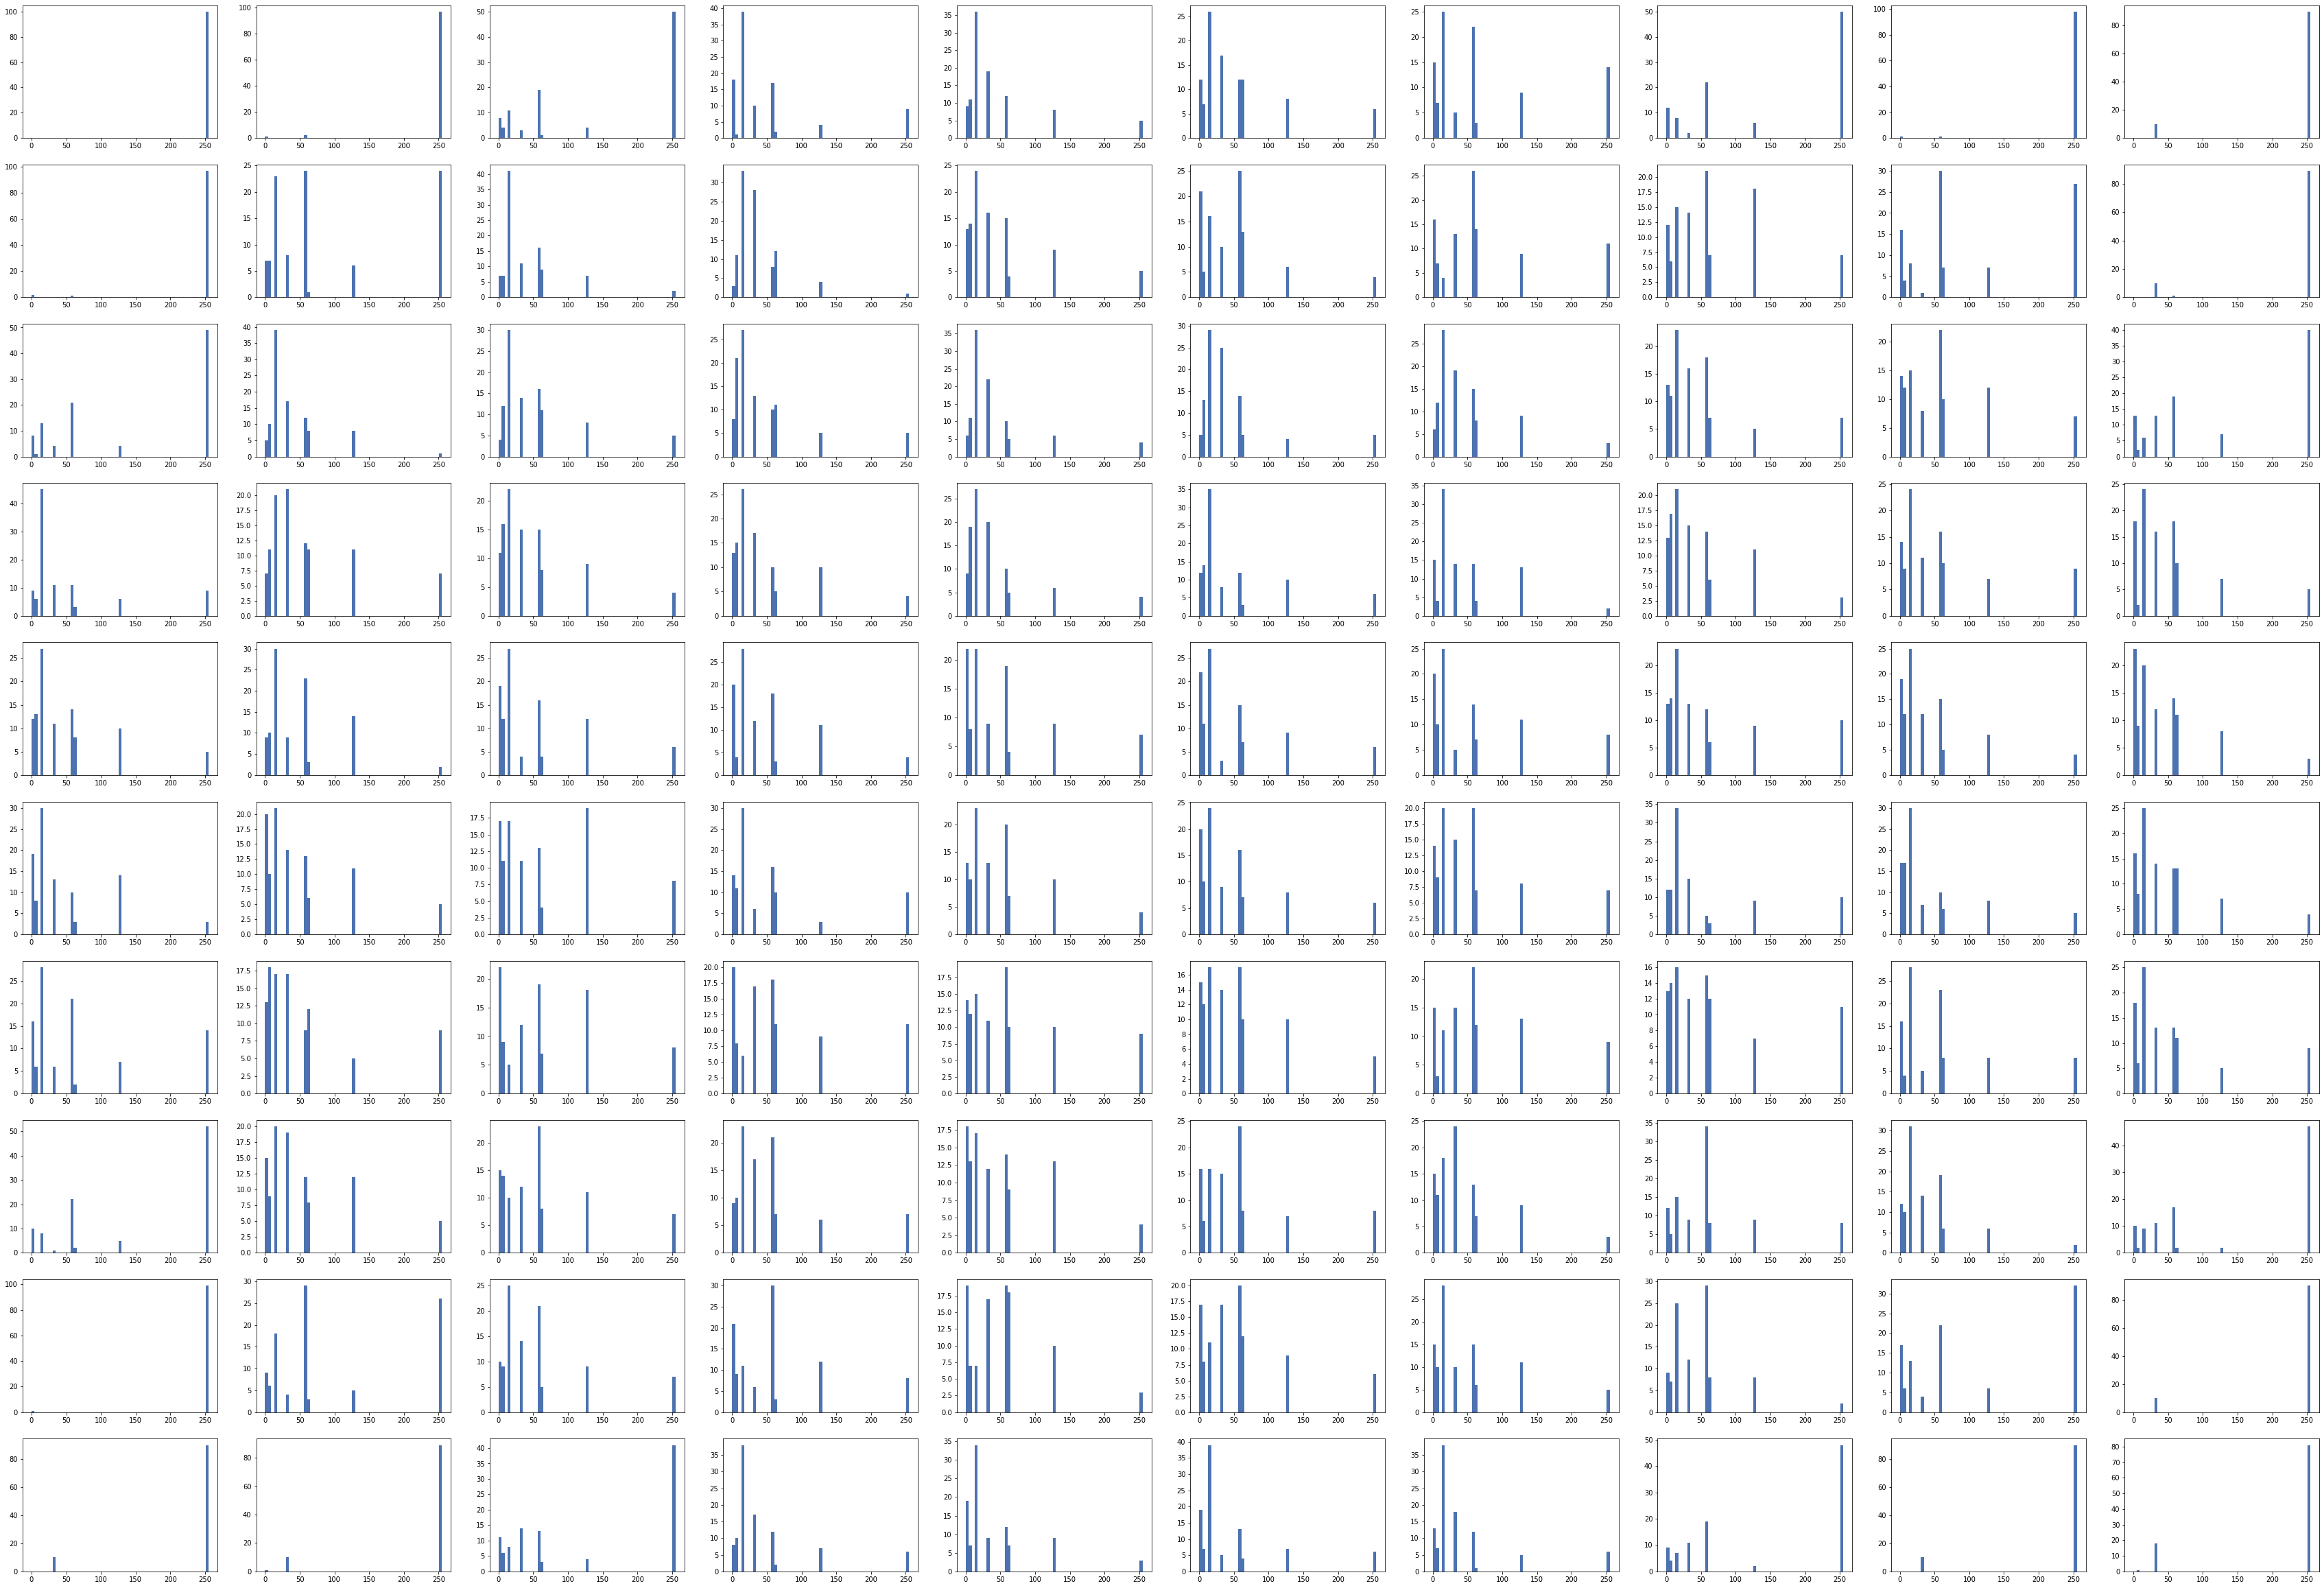

In [18]:
deneme = RLBP(img_lbp,10,10)
x,y,_,_ = deneme.shape
previous_values = {}
fig,ax = plt.subplots(ncols=x,nrows=y,figsize=(60,42))


for i in range(x):
    for j in range(y):
        ax[i][j].hist(deneme[i][j].flat,bins=59,range=(0,255))        
        #cv2.imshow("deneme",deneme[i])
        #cv2.waitKey(0)
        
       

        
        

#plt.show()
#print(previous_values)
#print(len(previous_values))
print(x)
print(y)
#plt.tight_layout()
#plt.savefig('hist.png')
#plt.show()

#deneme = deneme.swapaxes(1,2)
#deneme = deneme.reshape(100,100)
#cv2.imshow("deneme",deneme)
#cv2.waitKey(0)

In [52]:

#for i in range(10):
    #for j in range(10):
        #deneme[i][j] = np.multiply(deneme[i][j],weights[i][j]) 
#deneme = deneme.swapaxes(0,1)
#deneme = deneme.reshape(100,100)
#cv2.imshow("deneme",deneme)
#cv2.waitKey(0)
print(deneme[0][:])


[[[ 59  59  31  31  59   1  31   1  31   1]
  [255  59   3  63   1 255  59 127  59  59]
  [127  59 127  63  31 127   0  59  31  59]
  [255   1   1 255  59  15  31   3 127   7]
  [255   7  59  59 255   7  59 127  63 127]
  [255  59 255   1 255 255 255  59  63 127]
  [ 59 255  59  59  63  15 255  59   0  59]
  [255 255 255 255   0   3  59  59   7  59]
  [255 255 127  63  59 255  59   7  63   7]
  [  7 127  31  31 255   1 127  59 255 255]]

 [[  1   0  59  59  59  31  59  59  59   0]
  [255  59 255  59  59  59  31 255  63  31]
  [ 59   1  59   3  31   3  59  63   7  31]
  [ 63  15  15  31  15 127   7 127   3  59]
  [255  59 127  59 255  59 127  31  59 255]
  [  0 127 255   1  63   7  59 255   3  59]
  [ 59  59 127  59  63  59 255  59  31  63]
  [ 59  63  63  59 255 255  59  63 255 255]
  [ 59 127 255  59   3   1  59  15   7 255]
  [  3  59   1  15 127 127   1  59  63  31]]

 [[  1   1  59  59  59   1  31  59  59   0]
  [ 63  15  59 255  31   1   3  15 127  59]
  [127 127   3  59   7   7  

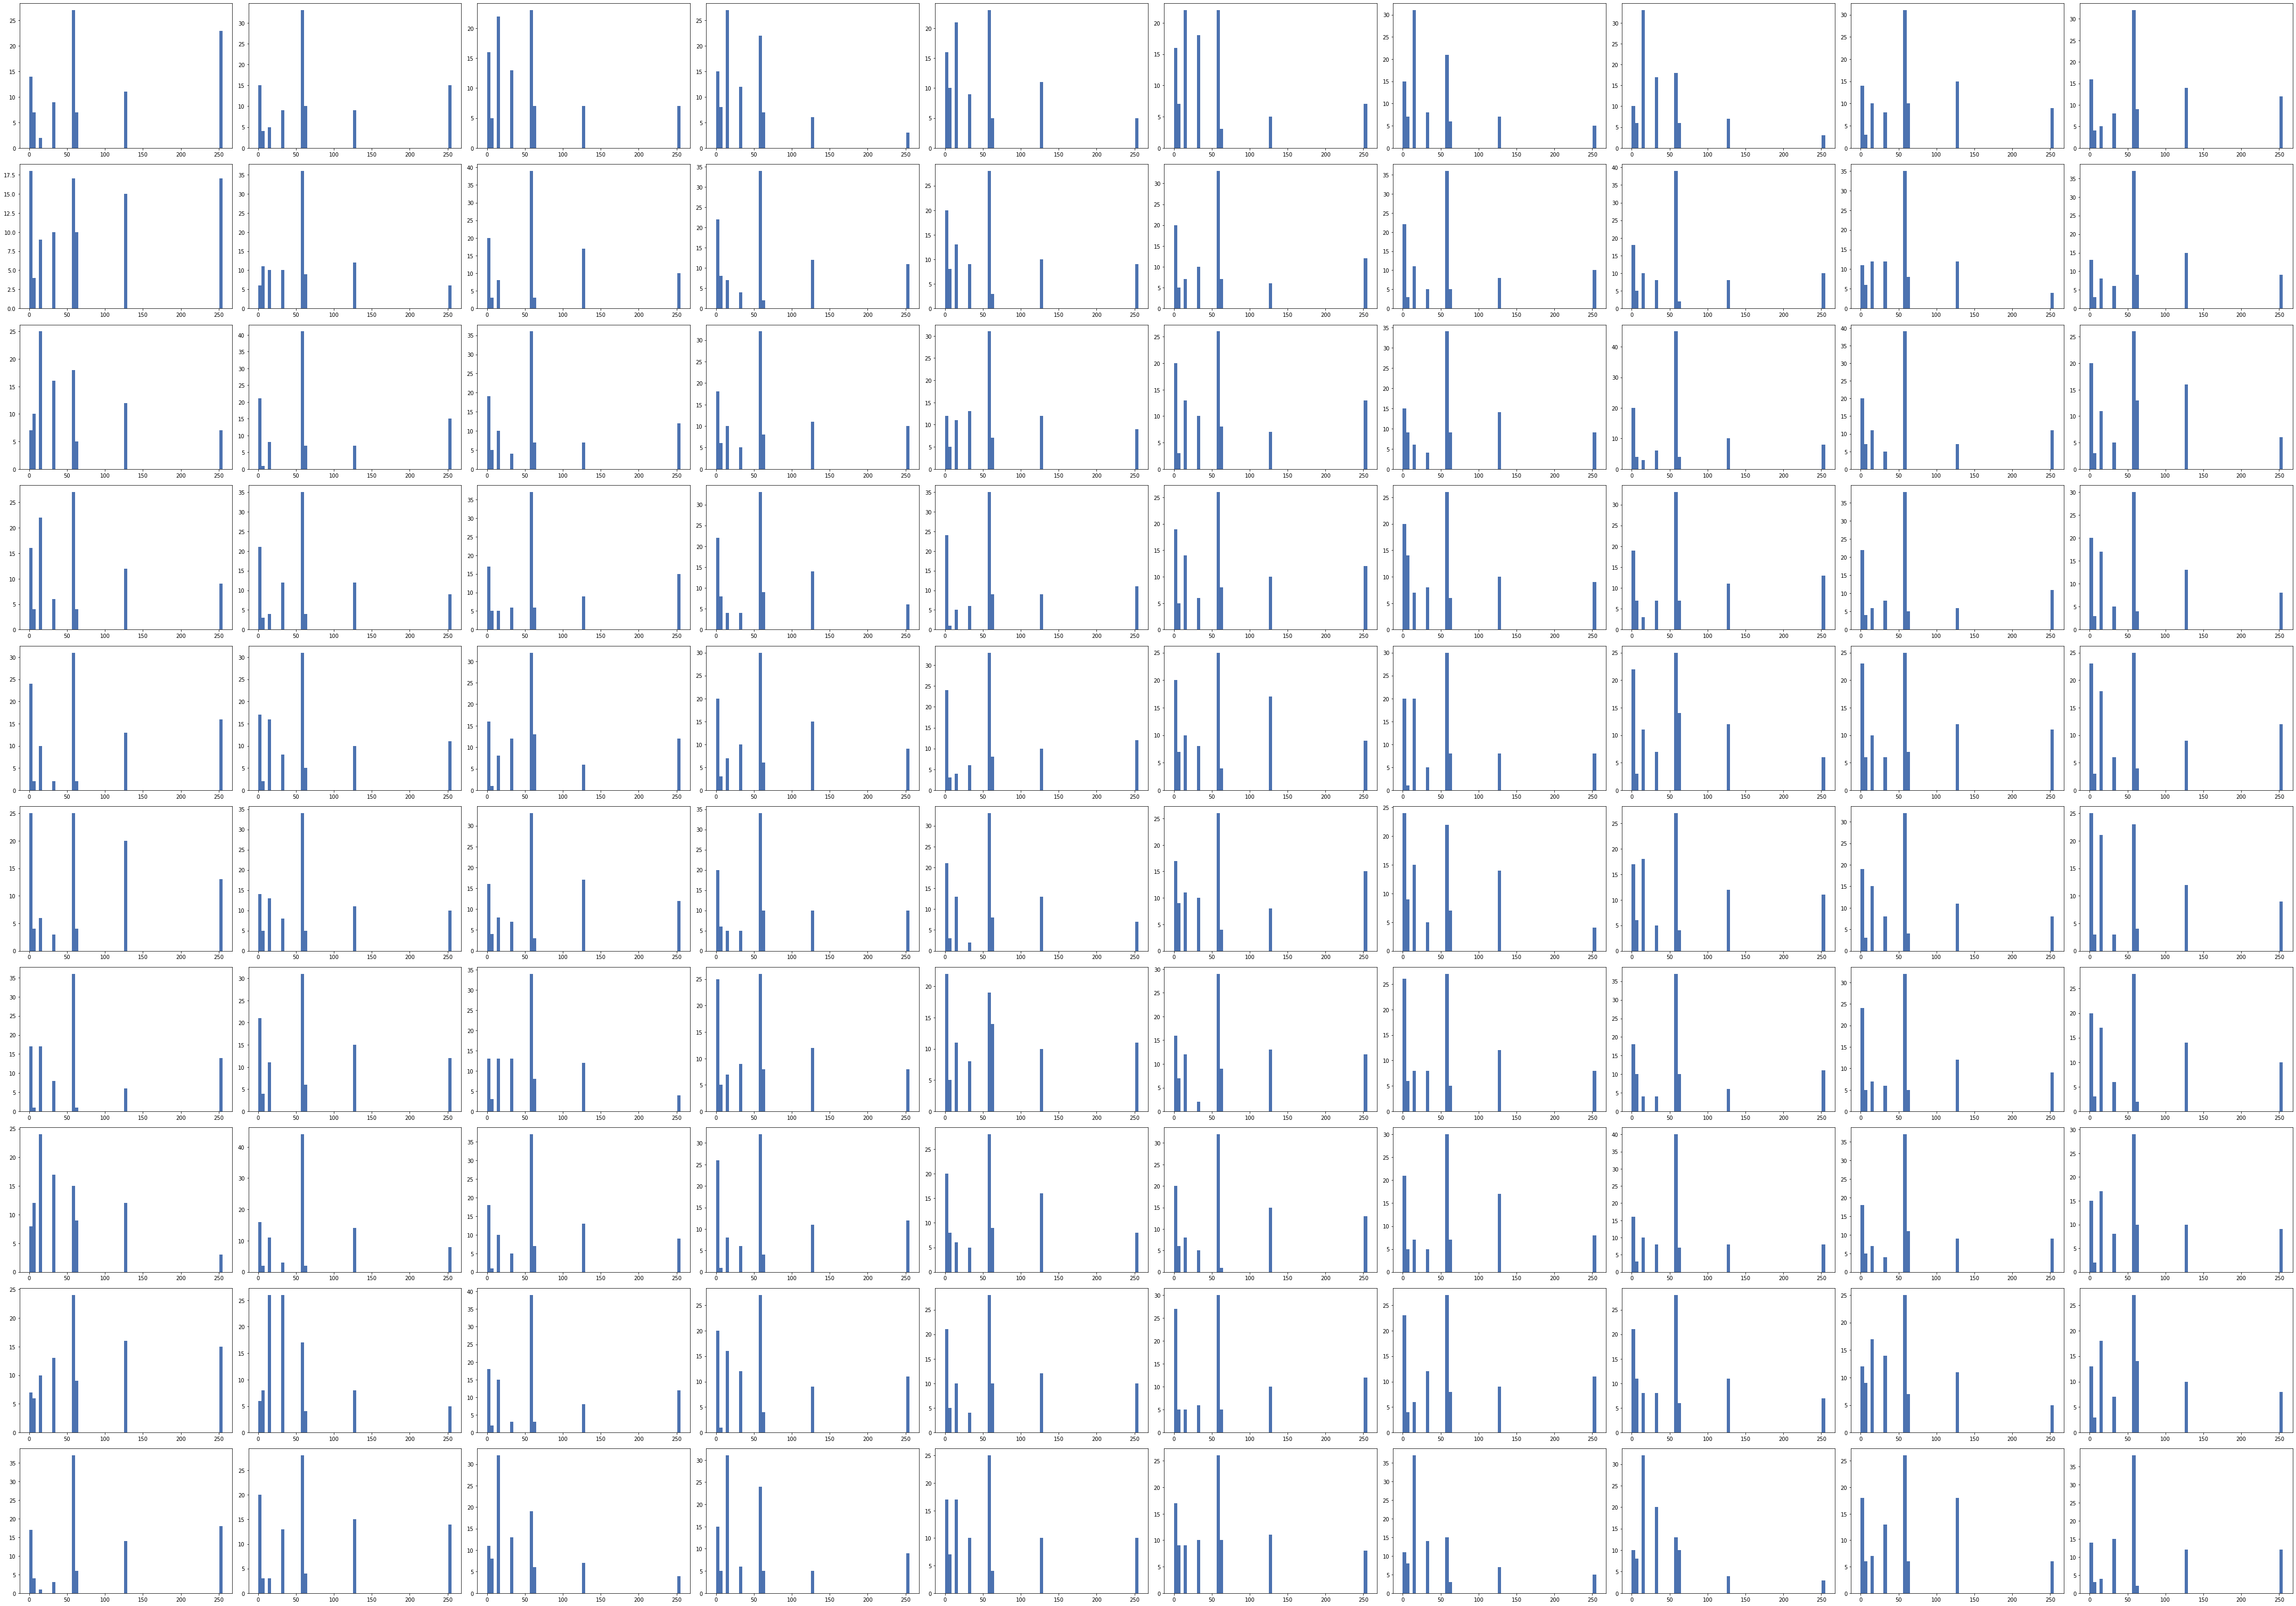

In [12]:
# görünütünün gridlere ayrılmış halinin( her 10*10'luk bölgenin) histogramını çizdirmek
x,y,_,_ = deneme.shape
previous_values = {}
fig,ax = plt.subplots(ncols=x,nrows=y,figsize=(60,42))


for i in range(x):
    for j in range(y):
        ax[i][j].hist(deneme[i][j].flat,bins=59,range=(0,255))        
        #cv2.imshow("deneme",deneme[i])
        #cv2.waitKey(0)
plt.tight_layout()
plt.savefig('hist2.png')
plt.show()


In [19]:
feature_vector = np.zeros((10,10,10,10),dtype=np.uint16) #uint8 max 255 e kadar değerler alıyor 
for i in range(10):
    for j in range(10):
        feature_vector[i][j] = np.multiply(deneme[i][j],weights[i][j]) 
        
#print(weights[3][:])
#print(weights[3][3])
#print(feature_vector[3][3])
#feature_vector = feature_vector.swapaxes(1,2) # swap axes ile alakalı bir problem olabilir birleştirirken nasıl birleştiriyor ona bir bak
#feature_vector = feature_vector.reshape(100,100)
#print("******************************************************************************************************\n")
#print(*feature_vector)

#print(deneme.shape)
#print(weights.shape)

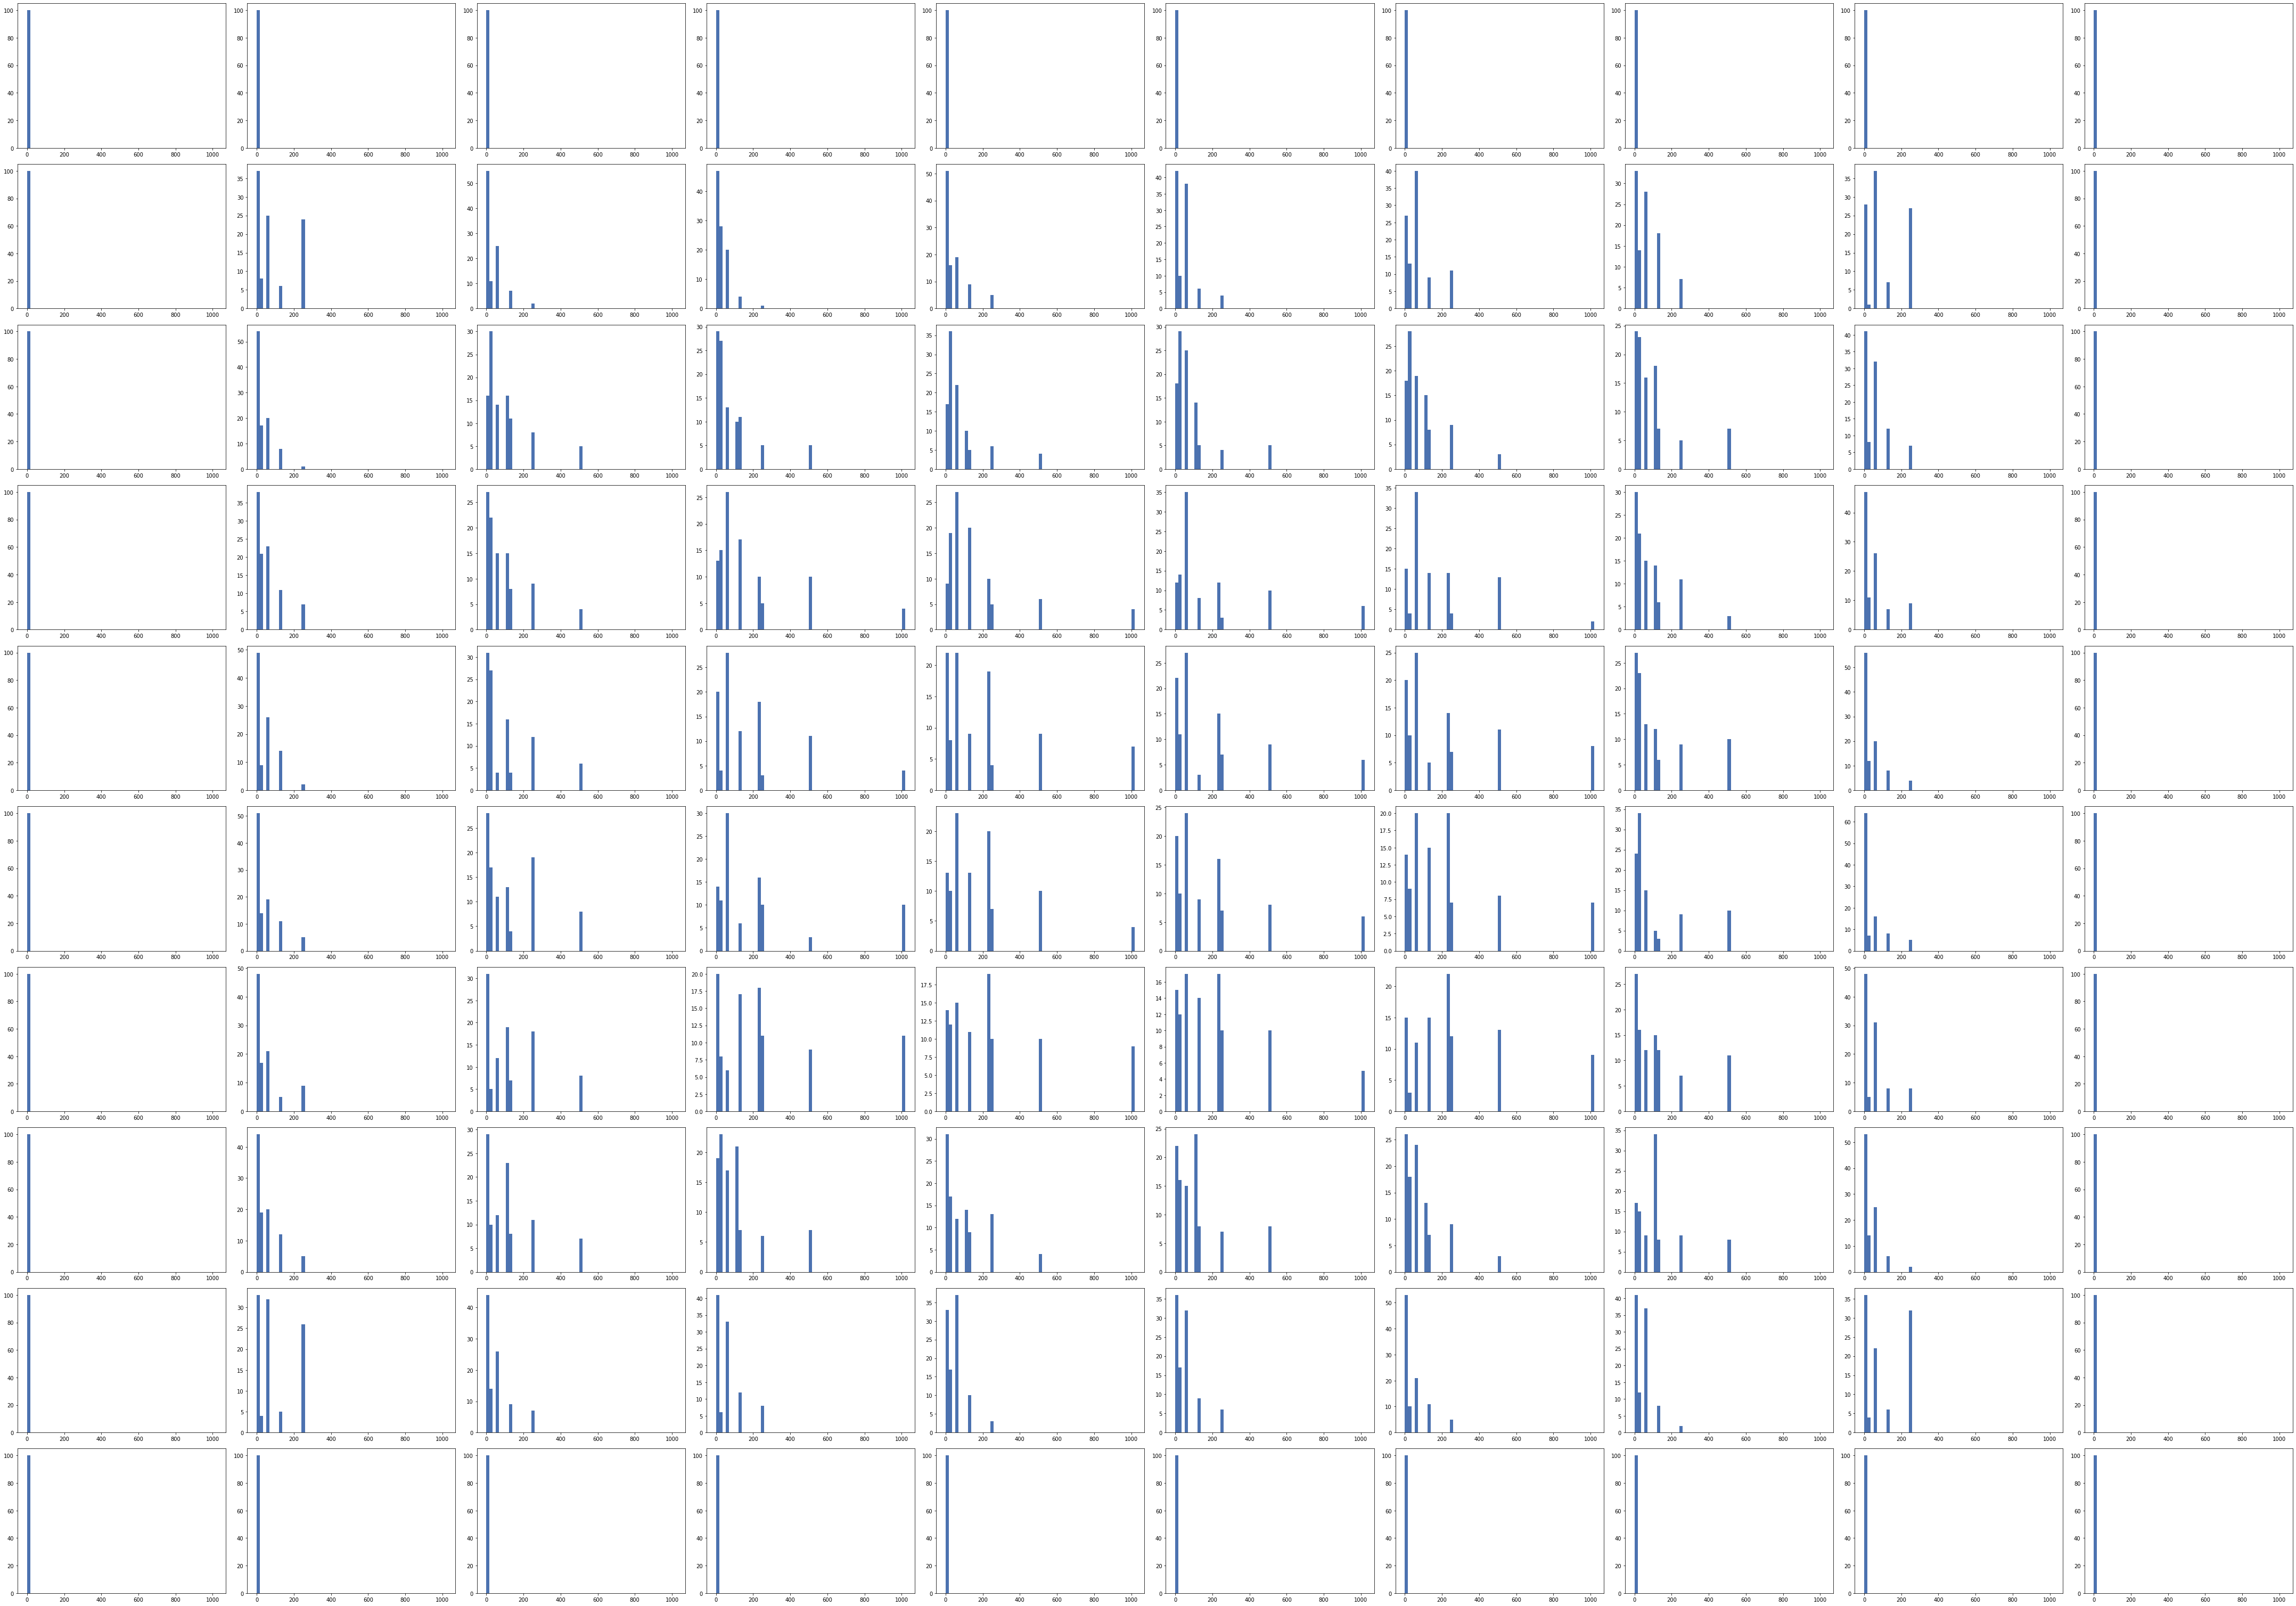

bitti


In [20]:
# özellik vektöürünü çizdirmek 
x,y,_,_ = feature_vector.shape
max_value = np.amax(feature_vector)
fig,ax = plt.subplots(ncols=x,nrows=y,figsize=(60,42))


for i in range(x):
    for j in range(y):
        ax[i][j].hist(feature_vector[i][j].flat,bins=59,range=(0,max_value))        
        #cv2.imshow("deneme",deneme[i])
        #cv2.waitKey(0)
plt.tight_layout()
plt.savefig('feature_vector_yerel_histogram.png')
plt.show()
print("bitti")

In [ ]:
# birleştirilmiş halinin histogramı nasıl olacak ? 

In [24]:
print(deneme[3][3])

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


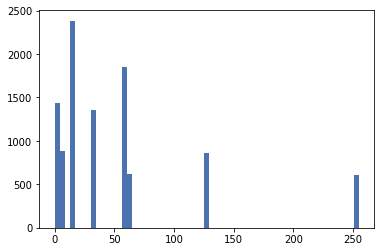

In [39]:
 plt.hist(img_lbp.flat,bins=59,range=(0,255));

dict_values([1549, 2854, 2029, 3975, 10224, 5987, 10601, 3264, 4362, 3555])


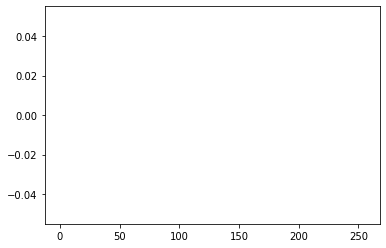

In [25]:
# deneme = RLBP(img_lbp,10,10)
x,y,_,_ = deneme.shape
previous_values = {}

for i in range(x):
    for j in range(y):
       # print(deneme[i][j])
        c = Counter(deneme[i][j].flat)
        previous_values = dict(Counter(c)+Counter(previous_values))
        previous_values= dict(sorted(previous_values.items()))
        
        

#plt.show()
#print(previous_values)
print(previous_values.values())
plt.hist(previous_values.values(),bins=59,range=(0,255));

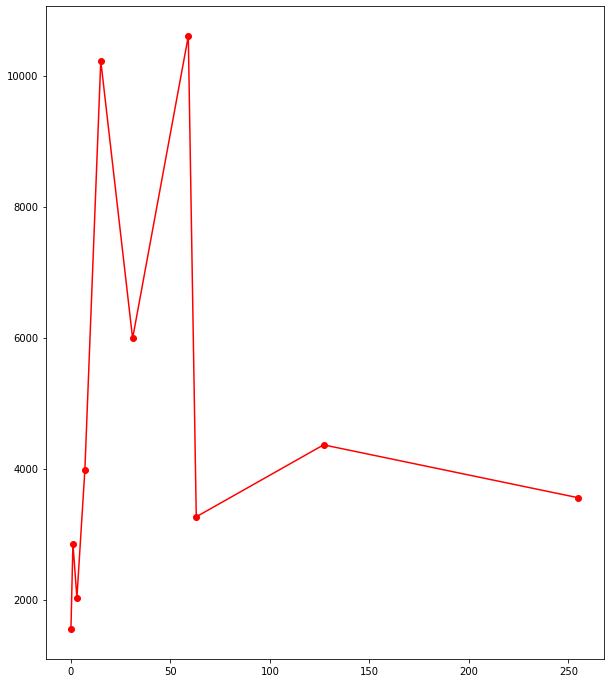

{0: 1549, 1: 2854, 3: 2029, 7: 3975, 15: 10224, 31: 5987, 59: 10601, 63: 3264, 127: 4362, 255: 3555}
<class 'dict'>


In [16]:
c = Counter(img_lbp.flat)
fig = plt.figure(figsize=(10,12))
#plt.bar(c.keys(), c.values())
c = dict(sorted(c.items()))
plt.plot(list(c.keys()), list(c.values()), color='red', marker='o')

plt.show()
print(c)
print(type(c))

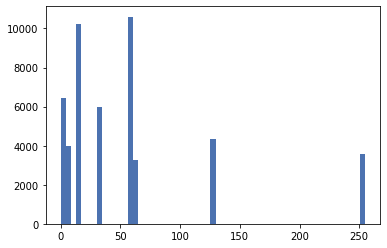

In [12]:
plt.hist(img_lbp.flat,bins=59,range=(0,255));
plt.savefig('hist.png')

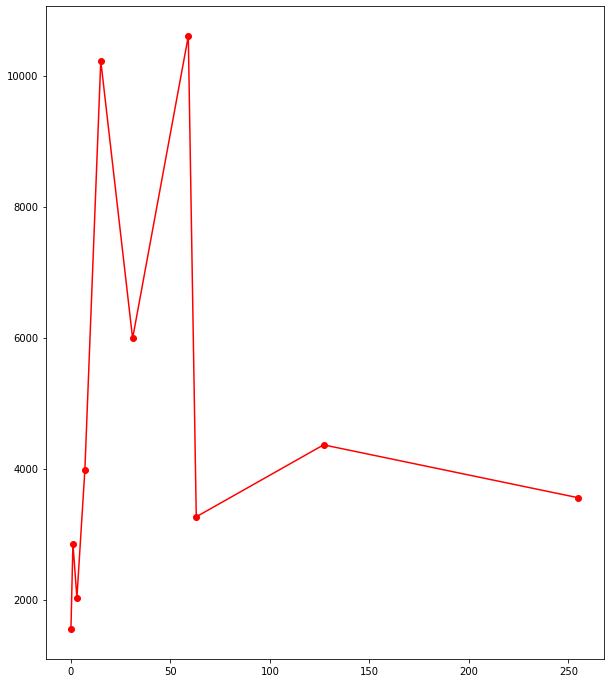

{0: 1549, 1: 2854, 3: 2029, 7: 3975, 15: 10224, 31: 5987, 59: 10601, 63: 3264, 127: 4362, 255: 3555}
<class 'dict'>


In [13]:
c = Counter(img_lbp.flat)
fig = plt.figure(figsize=(10,12))
#plt.bar(c.keys(), c.values())
c = dict(sorted(c.items()))
plt.plot(list(c.keys()), list(c.values()), color='red', marker='o')

plt.show()
print(c)
print(type(c))

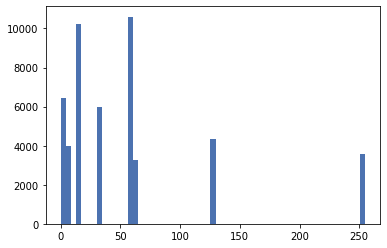

In [14]:
plt.hist(img_lbp.flat,bins=59,range=(0,255));

AttributeError: 'tuple' object has no attribute 'set_title'

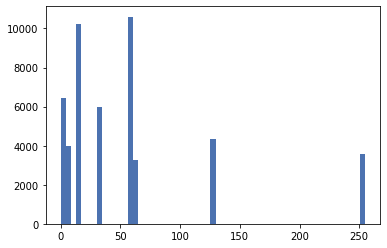

In [334]:
ax = plt.hist(img_lbp.flat,bins=59,range=(0,255));
ax.set_title("dd")

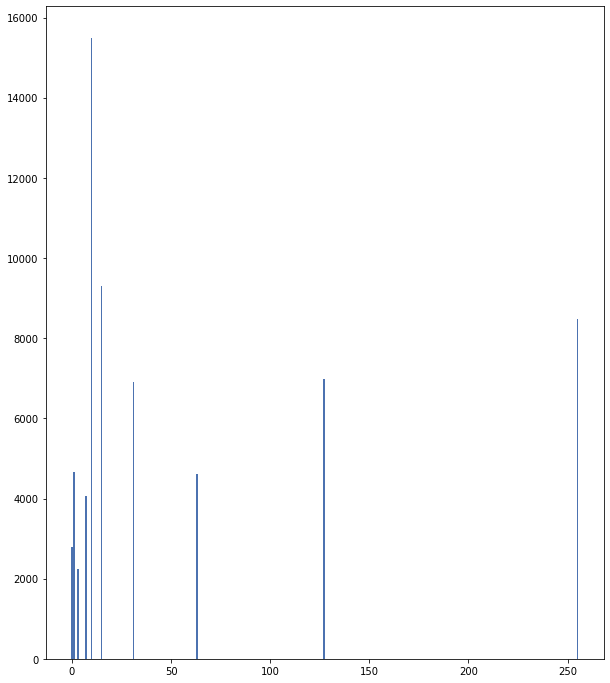

Counter({10: 15503, 15: 9302, 255: 8484, 127: 6970, 31: 6913, 1: 4663, 63: 4609, 7: 4067, 0: 2779, 3: 2246})


In [125]:
c = Counter(img_lbp.flat)
fig = plt.figure(figsize=(10,12))
plt.bar(c.keys(), c.values())

plt.show()
print(c)

In [23]:
import cv2
img_bgr = cv2.imread("elbise.png")
gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
cv2.imwrite("gri_elbise.png",gray)

True